# Import required libraries, fetch data into pandas.DataFrame, clean data

In [3]:
import numpy as np
import sqlite3
import matplotlib.pylab as plt
np.set_printoptions(precision=15)
import pandas as pd
#### We need to import the PCA library from scikit learn library
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Normalizing (scaling) the data is VERY important - indeed can be important to many machine learning algorithms.
# We take our original features and scale them so that they all have zero mean and unit variance
from sklearn import preprocessing


# Now we will connect to the database by creating a connection object called conn.
conn = sqlite3.connect('database.sqlite')

# We can create a cursor object using the conn object method
# The cursor object has methods for accessing the data
c = conn.cursor()
# Get the database table list from information in the sqlite_master table
# It is conventional to type SQL commands in all caps
print ('======')
print ('Tables in the database')
# Set the execute SQL command
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
# Fetch and print all data that accords with the execute command above
print(c.fetchall())


# Set the execute SQL command for getting table information from table called Player
c.execute("PRAGMA table_info(Player_Attributes);")
# Fetch all data that accords with the execute command above
print ('=======================')
print ('Columns in Player_Attributes Table')
[print(row) for row in c.fetchall()[0:5]] # preview first 5 rows
c.execute("PRAGMA table_info(Player_Attributes);")
print ([row[1] for row in c.fetchall()]) # print only the column heads of the table
print ('=======================')


# from table called Player_Attributes
numeric_col = ['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']
numeric_skills = "overall_rating, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes"
non_numeric_col = ['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
non_numeric = 'id, player_fifa_api_id, player_api_id, date, potential, preferred_foot, attacking_work_rate, defensive_work_rate'
table = 'Player_Attributes'
sql_numeric = 'SELECT ' + numeric_skills + ' FROM ' + table  
sql_non_numeric = 'SELECT ' + non_numeric + ' FROM ' + table

'''  
## pandas actually has a command to read_sql or read_sql_query and return a pandas.DataFrame
## coerce_float=True argument to force float data type
# We can create a cursor object using the conn object method
# The cursor object has methods for accessing the data
c = conn.cursor()
# Set the execute SQL command  
c.execute(sql) 
# Fetch all data that accords with the execute command above
# NOTE: This command returns a list of tuples!!
allrows = c.fetchall()

'''
# run pandas function (read_sql or read_sql_query) to execute sql and return a pandas.DataFrame
df_non_numeric=pd.read_sql_query(sql_non_numeric, conn, coerce_float=False, params=None, parse_dates=True, chunksize=None)
df_numeric=pd.read_sql_query(sql_numeric, conn, coerce_float=True, params=None, parse_dates=None, chunksize=None)
#print(dfdf_unscaled_data.head())
df=pd.concat([df_non_numeric, df_numeric], axis=1)
print('concatenated: ', df.shape)
print('before: ', df.shape)
df.dropna(axis=0, how='any', inplace=True)  #drop row (sample) with any NA entry
df.sort_values(by='overall_rating',axis=0)
df.drop_duplicates(inplace=True)
print ('after: ',df.shape)
df_unscaled_data = df.drop(non_numeric_col,axis=1)
print(df_unscaled_data.head())
print(df_unscaled_data.shape)



Tables in the database
[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]
Columns in Player_Attributes Table
(0, 'id', 'INTEGER', 0, None, 1)
(1, 'player_fifa_api_id', 'INTEGER', 0, None, 0)
(2, 'player_api_id', 'INTEGER', 0, None, 0)
(3, 'date', 'TEXT', 0, None, 0)
(4, 'overall_rating', 'INTEGER', 0, None, 0)
['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk

## Preprocess datat and conduct PCA - principal component analysis

In [4]:
scaled_data = preprocessing.scale(df_unscaled_data) #center and scale the data
print('scaled data:')
print (scaled_data)  # preview scaled data

# create a PCA object.  
# sklean uses this PCA object that can be trained using one dataset and applied to another dataset
pca = PCA()  
print(type(pca))
# do PCA math, calculate loading scores and the variation each PCA accounts for
pca.fit(scaled_data)  
# generate coordinates for a PCA graph based on the loading scores and the scaled data
pca_data = pca.transform(scaled_data) 


scaled data:
[[-0.232688299918464 -0.356120225592719 -0.313109292432732 ...
  -0.49784259951924  -0.498735528740831 -0.484440812315552]
 [-0.232688299918464 -0.356120225592719 -0.313109292432732 ...
  -0.49784259951924  -0.498735528740831 -0.484440812315552]
 [-0.944135285764455 -0.356120225592719 -0.313109292432732 ...
  -0.49784259951924  -0.498735528740831 -0.484440812315552]
 ...
 [ 1.190205671773518  1.09339187343687   1.104830770378076 ...
   2.481748745366256  0.247963723517858  0.213826230222697]
 [ 1.332495068942716  1.09339187343687   0.737216680019719 ...
   2.481748745366256  0.247963723517858  0.213826230222697]
 [ 1.617073863281113  1.09339187343687   0.947281874510209 ...
   2.718224248928597 -0.560960466429055 -0.077118370834907]]
<class 'sklearn.decomposition.pca.PCA'>


## Present Explained Variance, Scree Plot and Principal Components Scatter Matrix

percent of explained variance: 
[46.1 16.3  8.2  5.6  4.5  2.3  2.   1.4  1.3  1.1  1.   0.9  0.9  0.8
  0.7  0.7  0.6  0.6  0.5  0.5  0.5  0.5  0.4  0.4  0.3  0.3  0.3  0.2
  0.2  0.2  0.1  0.1  0.1  0.1]
 


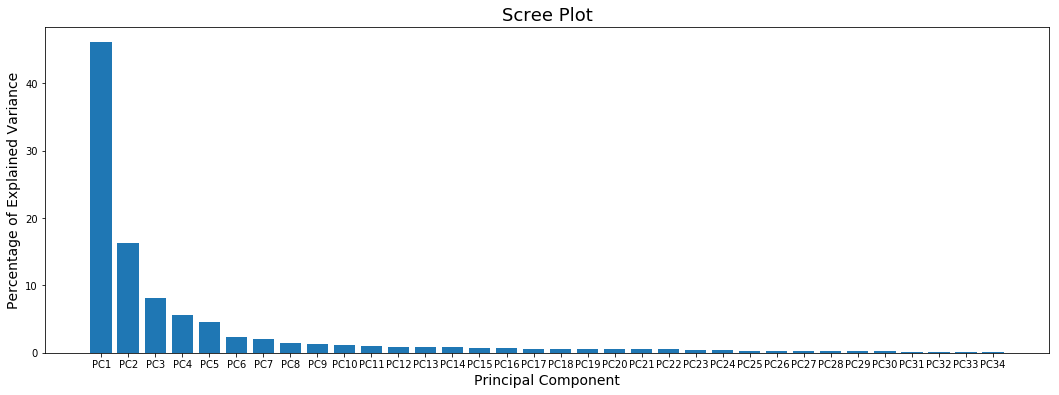

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.011244  2.663945 -1.593849  0.455767  0.694180  0.425937  0.294744   
1  1.011244  2.663945 -1.593849  0.455767  0.694180  0.425937  0.294744   
2  1.289105  1.974313 -2.159860  0.621872  0.610001  0.478296  0.181818   
3  1.488741  1.857404 -2.429469  0.647594  0.512821  0.486676  0.180393   
4  1.488741  1.857404 -2.429469  0.647594  0.512821  0.486676  0.180393   

        PC8       PC9      PC10    ...         PC25      PC26      PC27  \
0  0.307351  0.060968 -0.094032    ...    -0.025388  0.555732 -0.046965   
1  0.307351  0.060968 -0.094032    ...    -0.025388  0.555732 -0.046965   
2  0.171662  0.015145 -0.286018    ...     0.220140  0.568373  0.109613   
3  0.117666  0.086882 -0.332616    ...     0.167109  0.565402  0.111494   
4  0.117666  0.086882 -0.332616    ...     0.167109  0.565402  0.111494   

       PC28      PC29      PC30      PC31      PC32      PC33      PC34  
0 -0.067325 -0.264808 -0

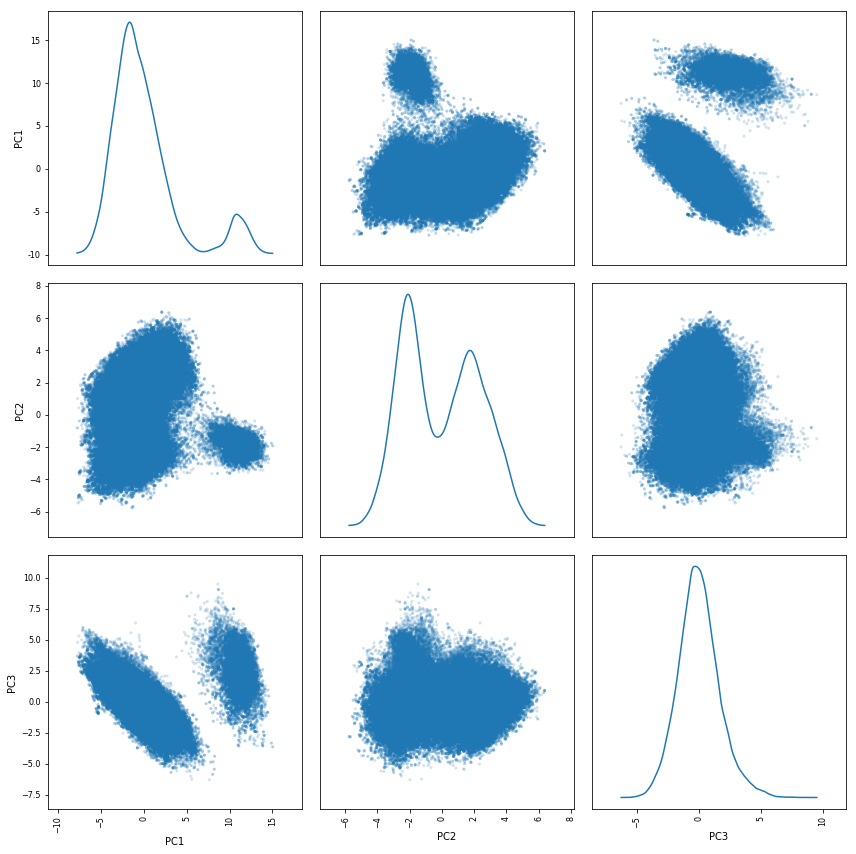

In [5]:
# pca.explained_variance_ratio_ is <class 'numpy.ndarray'>. 
# It calculates the percentage of variance that each principal component accoutns for
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1) 
print('=======================')
print('percent of explained variance: ')
print(per_var)
PC_labels = ['PC'+ str(x) for x in range(1,len(per_var)+1)] # labels for the Scree Plot: PC1, PC2 ...
print(' ')
print('=======================')

# create Scree Plot
plt.figure(figsize=(18, 6))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=PC_labels)
plt.ylabel('Percentage of Explained Variance', fontsize='14')
plt.xlabel('Principal Component', fontsize='14')
plt.title('Scree Plot', fontsize='18')
plt.show()
plt.close()

# put pca_data with DataFrame with PC_labels
pca_df = pd.DataFrame(pca_data, index=None, columns=PC_labels) 
print(pca_df.head()) # preview transformed and scaled  
print('=======================')


# PC1, PC2 AND PC3 account for 45.1%, 15.8% and 9.1% of variance.  
print('Principal Components Scatter Matrix')
df_3pc= pca_df[['PC1', 'PC2', 'PC3']]
pd.plotting.scatter_matrix(df_3pc, alpha=0.2, figsize=(12, 12), diagonal='kde',range_padding =0.3)
plt.tight_layout()
plt.show()
plt.close()


## Present PCA graphs

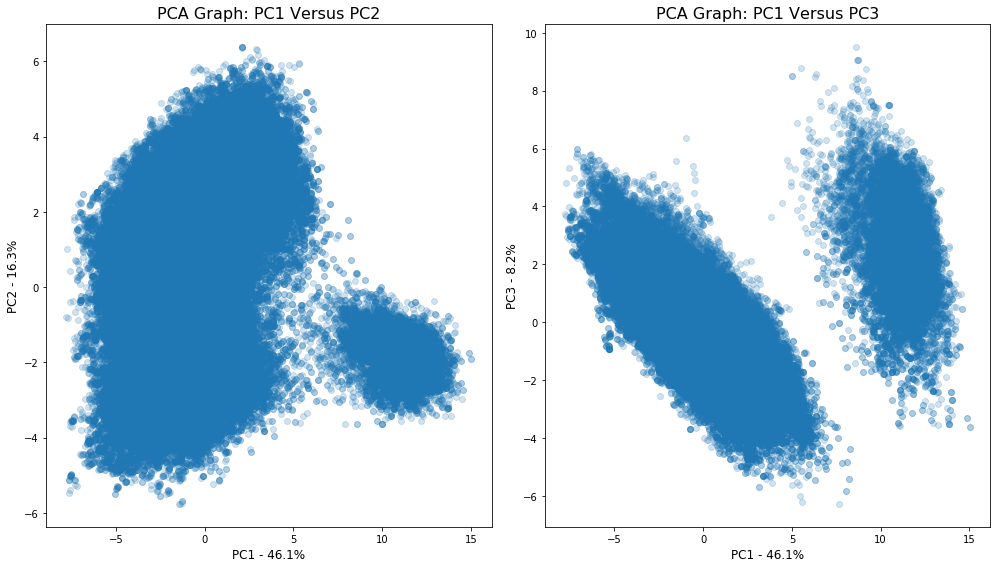

In [10]:

# draw PCA 2D plot
plt.figure(figsize=(14, 8))

plt.subplot(1,2,1)
plt.scatter(pca_df.PC1, pca_df.PC2 , alpha=0.2)
plt.title('PCA Graph: PC1 Versus PC2', fontsize='16')
plt.xlabel('PC1 - {0}%'.format(per_var[0]), fontsize='12')
plt.ylabel('PC2 - {0}%'.format(per_var[1]), fontsize='12')
plt.tight_layout()

plt.subplot(1,2,2)
plt.scatter(pca_df.PC1, pca_df.PC3 , alpha=0.2)
plt.title('PCA Graph: PC1 Versus PC3', fontsize='16')
plt.xlabel('PC1 - {0}%'.format(per_var[0]), fontsize='12')
plt.ylabel('PC3 - {0}%'.format(per_var[2]), fontsize='12')
plt.tight_layout()

plt.show()
plt.close()

## Take a Look at the Loading Scores of PC1, PC2 and PC3 to determine which feature has the largest influence in each principal component

In [17]:
loading_scores_PC1 = pd.Series(pca.components_[0],index=numeric_col)
print(loading_scores_PC1)
loading_scores_PC1_sorted = loading_scores_PC1.abs().sort_values(ascending=False)
print('Sorted PC1 Loading Scores (abs)')
print(loading_scores_PC1_sorted)
print(len(loading_scores_PC1))

loading_scores_PC2 = pd.Series(pca.components_[1],index=numeric_col)
loading_scores_PC2_sorted = loading_scores_PC2.abs().sort_values(ascending=False)
print('Sorted Loading Scores (abs)')
print(loading_scores_PC2_sorted)
print(len(loading_scores_PC2))

loading_scores_PC3 = pd.Series(pca.components_[2],index=numeric_col)
loading_scores_PC3_sorted = loading_scores_PC3.abs().sort_values(ascending=False)
print('Sorted PC3 Loading Scores (abs)')
print(loading_scores_PC3_sorted)
print(len(loading_scores_PC3))

overall_rating       -0.106626
crossing             -0.215145
finishing            -0.185707
heading_accuracy     -0.153722
short_passing        -0.228050
volleys              -0.195748
dribbling            -0.226678
curve                -0.209614
free_kick_accuracy   -0.194967
long_passing         -0.180721
ball_control         -0.239626
acceleration         -0.169524
sprint_speed         -0.167365
agility              -0.163619
reactions            -0.116337
balance              -0.143832
shot_power           -0.209597
jumping              -0.031864
stamina              -0.175874
strength             -0.016812
long_shots           -0.212485
aggression           -0.116159
interceptions        -0.089054
positioning          -0.204910
vision               -0.201170
penalties            -0.183800
marking              -0.067775
standing_tackle      -0.084087
sliding_tackle       -0.076373
gk_diving             0.200483
gk_handling           0.199075
gk_kicking            0.128046
gk_posit

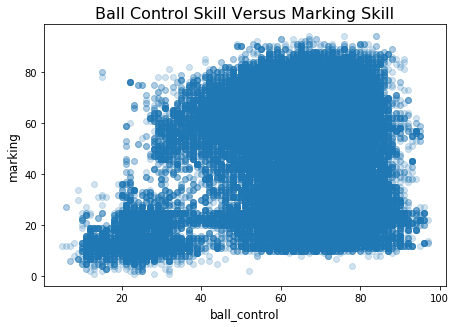

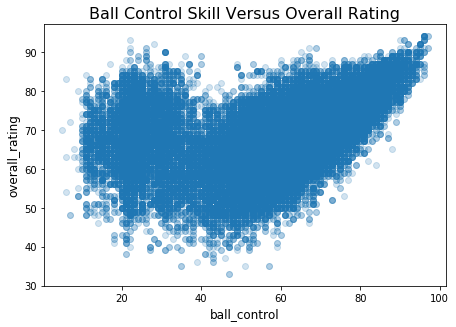

In [9]:
plt.scatter(df_unscaled_data['ball_control'], df_unscaled_data['marking'], alpha=0.2)
plt.tight_layout(pad=.3)
plt.title('Ball Control Skill Versus Marking Skill', fontsize='16')
plt.xlabel('ball_control', fontsize='12')
plt.ylabel('marking', fontsize='12')
plt.show()
plt.close()


plt.scatter(df_unscaled_data['ball_control'],df_unscaled_data['overall_rating'], alpha=0.2)
plt.tight_layout(pad=.3)
plt.title('Ball Control Skill Versus Overall Rating', fontsize='16')
plt.xlabel('ball_control', fontsize='12')
plt.ylabel('overall_rating', fontsize='12')
plt.show()
plt.close()


## Conclusion
When plotting just the three most influential skills, information of other attributes is lost.  These graphs do not show any clear cluster, whereas the graph of PC1 versus PC2 and the graph of PC1 versus PC3 show that data falls into two distinct clusters. One may investigate further with information from the database to find out what separates the players into two clusters. <br>

A closer look at the loading values for PC1 shows that, basically, no skill is more important than others.  
<br>
PC1 Loading Scores of first 11 attritbutes out of 34 total: <br>
ball_control          0.239626 <br>
short_passing         0.228050 <br>
dribbling             0.226678 <br>
crossing              0.215145 <br>
long_shots            0.212485 <br>
curve                 0.209614 <br>
shot_power            0.209597 <br>
positioning           0.204910 <br>
vision                0.201170 <br>
gk_diving             0.200483 <br>
gk_reflexes           0.200475 <br>

Obvisouly, all the skills are unique and require related special training.  The graphs do not show that skill level in one type correlates to another.   

### An important message to the players: all skills are important!